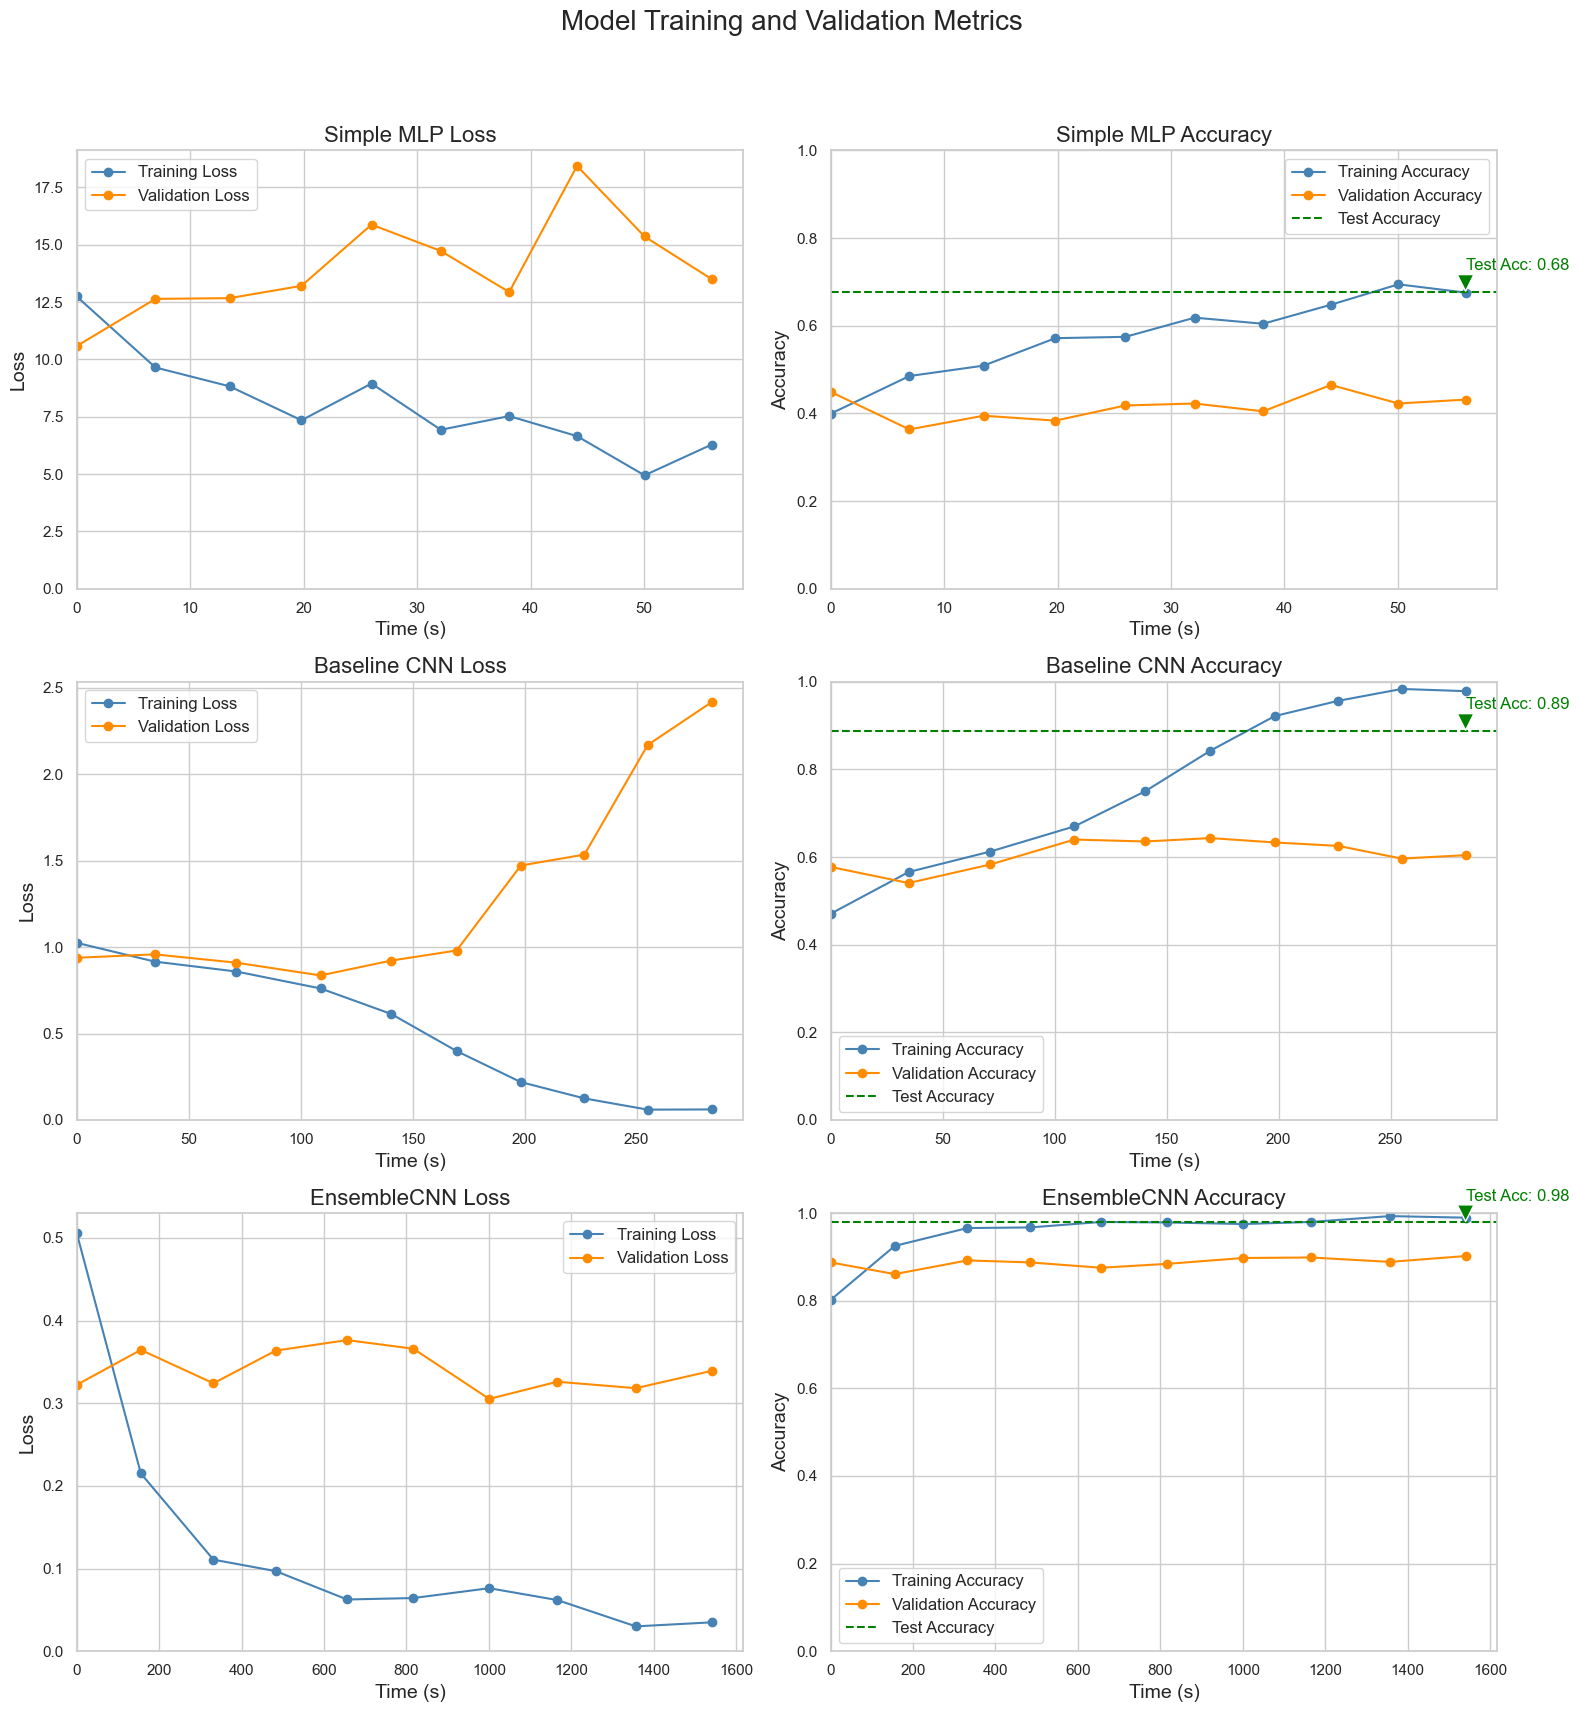

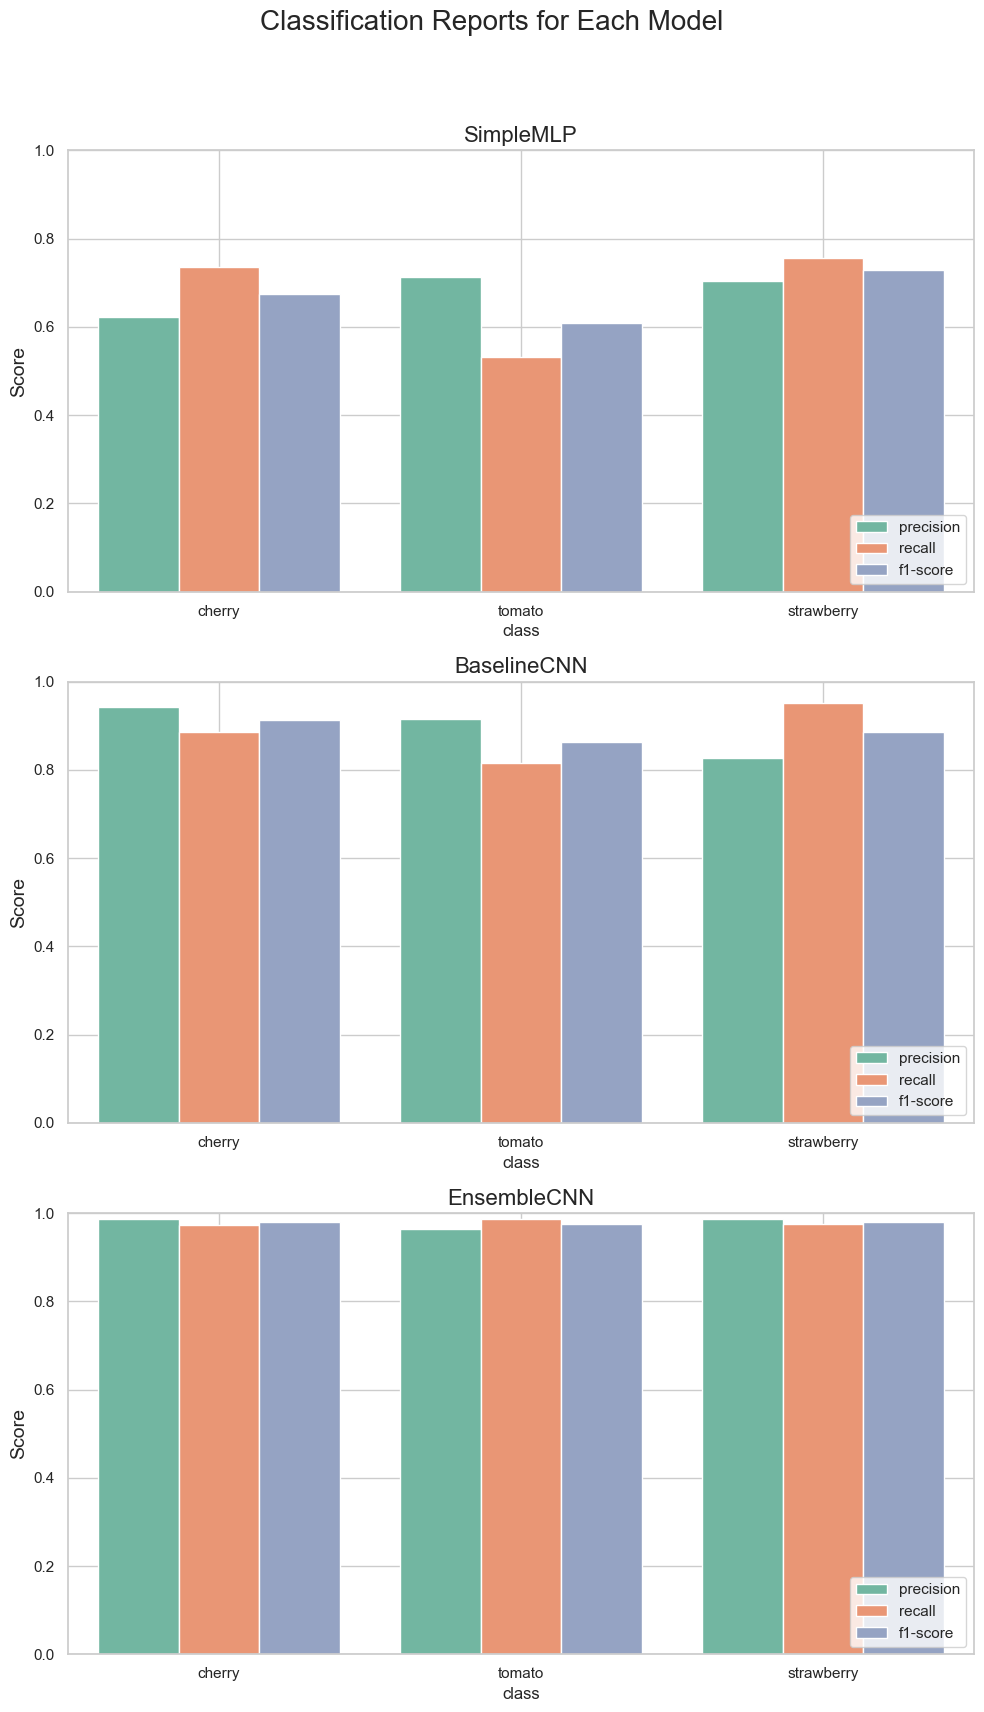

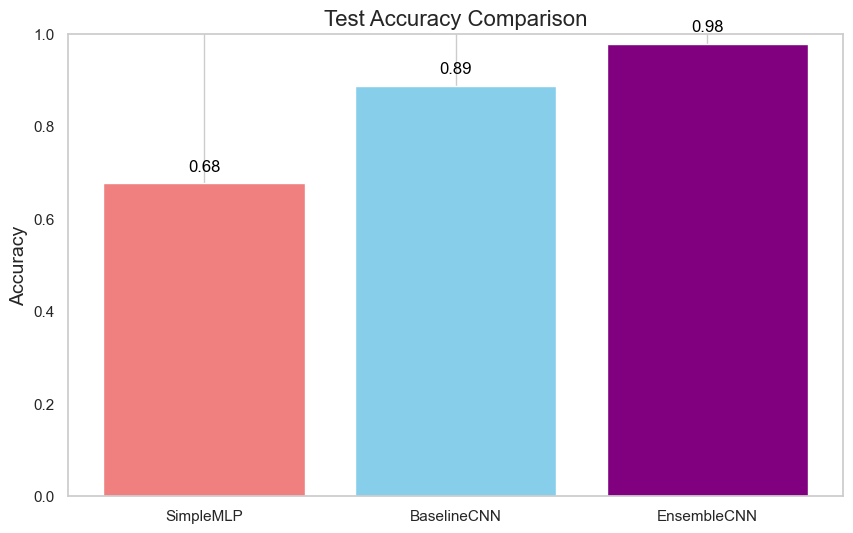

In [6]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set Seaborn style
sns.set(style='whitegrid')

# Load the metrics for each model
mlp_metrics = pd.read_csv('SimpleMLP_metrics.csv')
baseline_cnn_metrics = pd.read_csv('BaselineCNN_metrics.csv')
ensemble_cnn_metrics = pd.read_csv('EnsembleCNN_metrics.csv')
test_results = pd.read_csv('test_results.csv')

# Normalize the time columns to start from zero
mlp_metrics['time'] -= mlp_metrics['time'].iloc[0]
baseline_cnn_metrics['time'] -= baseline_cnn_metrics['time'].iloc[0]
ensemble_cnn_metrics['time'] -= ensemble_cnn_metrics['time'].iloc[0]

# Extract test accuracies
mlp_test_accuracy = test_results.loc[test_results['model_name'] == 'SimpleMLP', 'accuracy'].values[0]
baseline_cnn_test_accuracy = test_results.loc[test_results['model_name'] == 'BaselineCNN', 'accuracy'].values[0]
ensemble_test_accuracy = test_results.loc[test_results['model_name'] == 'EnsembleCNN', 'accuracy'].values[0]

# Load classification reports
def load_classification_report(model_name):
    filename = f'{model_name}_classification_report.csv'
    df = pd.read_csv(filename)
    return df

mlp_report = load_classification_report('SimpleMLP')
baseline_cnn_report = load_classification_report('BaselineCNN')
ensemble_report = load_classification_report('EnsembleCNN')

# Define the classes
classes = ['cherry', 'tomato', 'strawberry']
n_classes = len(classes)

# Define a function to plot training and validation metrics with test accuracy over time
def plot_metrics_with_time(mlp_df, baseline_cnn_df, ensemble_cnn_df,
                           mlp_test_acc, baseline_cnn_test_acc, ensemble_test_acc):
    time_mlp = mlp_df['time']
    time_baseline_cnn = baseline_cnn_df['time']
    time_ensemble_cnn = ensemble_cnn_df['time']
    
    # Set up a grid for the plots
    fig, axs = plt.subplots(3, 2, figsize=(16, 18))
    fig.suptitle('Model Training and Validation Metrics', fontsize=20)
    
    # MLP Loss
    axs[0, 0].plot(time_mlp, mlp_df['train_loss'], label='Training Loss', color='steelblue', marker='o')
    axs[0, 0].plot(time_mlp, mlp_df['val_loss'], label='Validation Loss', color='darkorange', marker='o')
    axs[0, 0].set_title('Simple MLP Loss', fontsize=16)
    axs[0, 0].set_xlabel('Time (s)', fontsize=14)
    axs[0, 0].set_ylabel('Loss', fontsize=14)
    axs[0, 0].legend(fontsize=12)
    axs[0, 0].grid(True)
    axs[0, 0].set_xlim(left=0)
    axs[0, 0].set_ylim(bottom=0)
    
    # MLP Accuracy
    axs[0, 1].plot(time_mlp, mlp_df['train_accuracy'], label='Training Accuracy', color='steelblue', marker='o')
    axs[0, 1].plot(time_mlp, mlp_df['val_accuracy'], label='Validation Accuracy', color='darkorange', marker='o')
    axs[0, 1].axhline(y=mlp_test_acc, color='green', linestyle='--', label='Test Accuracy')
    axs[0, 1].set_title('Simple MLP Accuracy', fontsize=16)
    axs[0, 1].set_xlabel('Time (s)', fontsize=14)
    axs[0, 1].set_ylabel('Accuracy', fontsize=14)
    axs[0, 1].legend(fontsize=12)
    axs[0, 1].grid(True)
    axs[0, 1].set_xlim(left=0)
    axs[0, 1].set_ylim(0, 1)
    
    # Annotate MLP test accuracy
    axs[0, 1].annotate(f'Test Acc: {mlp_test_acc:.2f}', xy=(time_mlp.iloc[-1], mlp_test_acc),
                       xytext=(time_mlp.iloc[-1], mlp_test_acc + 0.05),
                       arrowprops=dict(facecolor='green', shrink=0.05),
                       fontsize=12, color='green')
    
    # BaselineCNN Loss
    axs[1, 0].plot(time_baseline_cnn, baseline_cnn_df['train_loss'], label='Training Loss', color='steelblue', marker='o')
    axs[1, 0].plot(time_baseline_cnn, baseline_cnn_df['val_loss'], label='Validation Loss', color='darkorange', marker='o')
    axs[1, 0].set_title('Baseline CNN Loss', fontsize=16)
    axs[1, 0].set_xlabel('Time (s)', fontsize=14)
    axs[1, 0].set_ylabel('Loss', fontsize=14)
    axs[1, 0].legend(fontsize=12)
    axs[1, 0].grid(True)
    axs[1, 0].set_xlim(left=0)
    axs[1, 0].set_ylim(bottom=0)
    
    # BaselineCNN Accuracy
    axs[1, 1].plot(time_baseline_cnn, baseline_cnn_df['train_accuracy'], label='Training Accuracy', color='steelblue', marker='o')
    axs[1, 1].plot(time_baseline_cnn, baseline_cnn_df['val_accuracy'], label='Validation Accuracy', color='darkorange', marker='o')
    axs[1, 1].axhline(y=baseline_cnn_test_acc, color='green', linestyle='--', label='Test Accuracy')
    axs[1, 1].set_title('Baseline CNN Accuracy', fontsize=16)
    axs[1, 1].set_xlabel('Time (s)', fontsize=14)
    axs[1, 1].set_ylabel('Accuracy', fontsize=14)
    axs[1, 1].legend(fontsize=12)
    axs[1, 1].grid(True)
    axs[1, 1].set_xlim(left=0)
    axs[1, 1].set_ylim(0, 1)
    
    # Annotate BaselineCNN test accuracy
    axs[1, 1].annotate(f'Test Acc: {baseline_cnn_test_acc:.2f}', xy=(time_baseline_cnn.iloc[-1], baseline_cnn_test_acc),
                       xytext=(time_baseline_cnn.iloc[-1], baseline_cnn_test_acc + 0.05),
                       arrowprops=dict(facecolor='green', shrink=0.05),
                       fontsize=12, color='green')
    
    # EnsembleCNN Loss
    axs[2, 0].plot(time_ensemble_cnn, ensemble_cnn_df['train_loss'], label='Training Loss', color='steelblue', marker='o')
    axs[2, 0].plot(time_ensemble_cnn, ensemble_cnn_df['val_loss'], label='Validation Loss', color='darkorange', marker='o')
    axs[2, 0].set_title('EnsembleCNN Loss', fontsize=16)
    axs[2, 0].set_xlabel('Time (s)', fontsize=14)
    axs[2, 0].set_ylabel('Loss', fontsize=14)
    axs[2, 0].legend(fontsize=12)
    axs[2, 0].grid(True)
    axs[2, 0].set_xlim(left=0)
    axs[2, 0].set_ylim(bottom=0)
    
    # EnsembleCNN Accuracy
    axs[2, 1].plot(time_ensemble_cnn, ensemble_cnn_df['train_accuracy'], label='Training Accuracy', color='steelblue', marker='o')
    axs[2, 1].plot(time_ensemble_cnn, ensemble_cnn_df['val_accuracy'], label='Validation Accuracy', color='darkorange', marker='o')
    axs[2, 1].axhline(y=ensemble_test_acc, color='green', linestyle='--', label='Test Accuracy')
    axs[2, 1].set_title('EnsembleCNN Accuracy', fontsize=16)
    axs[2, 1].set_xlabel('Time (s)', fontsize=14)
    axs[2, 1].set_ylabel('Accuracy', fontsize=14)
    axs[2, 1].legend(fontsize=12)
    axs[2, 1].grid(True)
    axs[2, 1].set_xlim(left=0)
    axs[2, 1].set_ylim(0, 1)
    
    # Annotate EnsembleCNN test accuracy
    axs[2, 1].annotate(f'Test Acc: {ensemble_test_acc:.2f}', xy=(time_ensemble_cnn.iloc[-1], ensemble_test_acc),
                       xytext=(time_ensemble_cnn.iloc[-1], ensemble_test_acc + 0.05),
                       arrowprops=dict(facecolor='green', shrink=0.05),
                       fontsize=12, color='green')
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot metrics with test accuracy over time
plot_metrics_with_time(mlp_metrics, baseline_cnn_metrics, ensemble_cnn_metrics,
                       mlp_test_accuracy, baseline_cnn_test_accuracy, ensemble_test_accuracy)

# Additional Visualizations

# Modified function for a vertical stacked layout of classification reports
def plot_classification_reports_stacked(reports, model_names, classes):
    metrics = ['precision', 'recall', 'f1-score']
    num_models = len(reports)
    
    fig, axs = plt.subplots(num_models, 1, figsize=(10, 6 * num_models))
    fig.suptitle('Classification Reports for Each Model', fontsize=20)
    
    for i, (report_df, model_name) in enumerate(zip(reports, model_names)):
        report_df = report_df[report_df['class'].isin(classes)]
        report_df_melted = pd.melt(report_df, id_vars='class', value_vars=metrics, var_name='metric', value_name='value')
        sns.barplot(x='class', y='value', hue='metric', data=report_df_melted, ax=axs[i], palette='Set2')
        axs[i].set_title(f'{model_name}', fontsize=16)
        axs[i].set_ylabel('Score', fontsize=14)
        axs[i].set_ylim(0, 1)
        axs[i].legend(loc='lower right')
        axs[i].grid(True)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Prepare the reports and model names
reports = [mlp_report, baseline_cnn_report, ensemble_report]
model_names = ['SimpleMLP', 'BaselineCNN', 'EnsembleCNN']

# Plot classification reports in vertically stacked layout
plot_classification_reports_stacked(reports, model_names, classes)

# Test Accuracy Comparison between all models
def plot_test_accuracy_comparison(mlp_acc, baseline_cnn_acc, ensemble_acc):
    models = ['SimpleMLP', 'BaselineCNN', 'EnsembleCNN']
    accuracies = [mlp_acc, baseline_cnn_acc, ensemble_acc]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(models, accuracies, color=['lightcoral', 'skyblue', 'purple'])
    plt.title('Test Accuracy Comparison', fontsize=16)
    plt.ylabel('Accuracy', fontsize=14)
    plt.ylim(0, 1)
    plt.grid(axis='y')
    
    # Annotate the accuracy values on top of the bars
    for bar, acc in zip(bars, accuracies):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{acc:.2f}', ha='center', va='bottom', fontsize=12, color='black')
    
    plt.show()

# Call the function with the test accuracies
plot_test_accuracy_comparison(mlp_test_accuracy, baseline_cnn_test_accuracy, ensemble_test_accuracy)
